Head of data:
   MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0          60       RL         65.0     8450   Pave   NaN      Reg   
1          20       RL         80.0     9600   Pave   NaN      Reg   
2          60       RL         68.0    11250   Pave   NaN      IR1   
3          70       RL         60.0     9550   Pave   NaN      IR1   
4          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig  ... ScreenPorch PoolArea PoolQC Fence  \
0         Lvl    AllPub    Inside  ...           0        0    NaN   NaN   
1         Lvl    AllPub       FR2  ...           0        0    NaN   NaN   
2         Lvl    AllPub    Inside  ...           0        0    NaN   NaN   
3         Lvl    AllPub    Corner  ...           0        0    NaN   NaN   
4         Lvl    AllPub       FR2  ...           0        0    NaN   NaN   

  MiscFeature MiscVal  MoSold  YrSold  SaleType  SaleCondition  
0         NaN       0       2    2008      

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


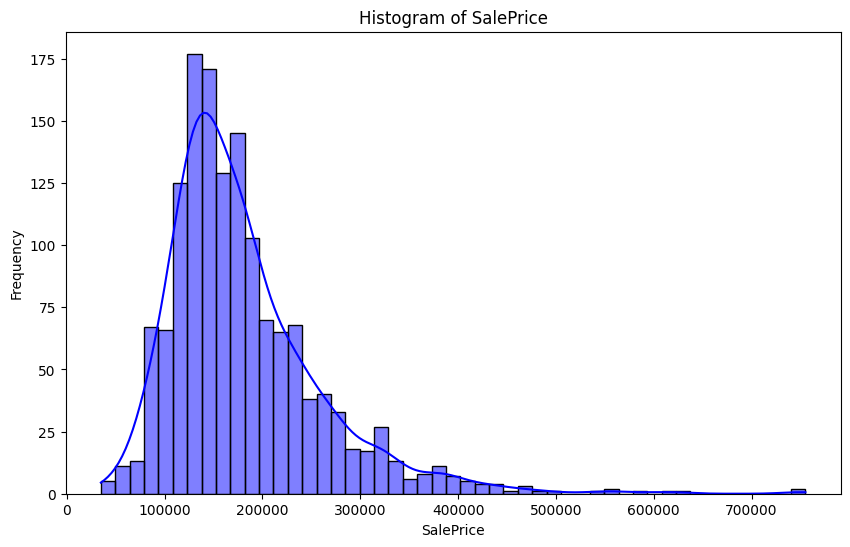

Train RMSE: 11020.328788171184
Validation RMSE: 28737.44572361762


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

# Load data
train_file_path = "../input/house-prices-advanced-regression-techniques/train.csv"
test_file_path = "../input/house-prices-advanced-regression-techniques/test.csv"

train_data = pd.read_csv(train_file_path)
test_data = pd.read_csv(test_file_path)

# Concatenate train and test data for preprocessing
all_data = pd.concat([train_data.drop('SalePrice', axis=1), test_data], axis=0)

# Drop Id column
all_data.drop('Id', axis=1, inplace=True)

# Display head of data
print("Head of data:")
print(all_data.head())

# Display data types
print("\nData types:")
print(all_data.dtypes)

# Plot histogram of SalePrice
plt.figure(figsize=(10, 6))
sns.histplot(train_data['SalePrice'], kde=True, color='blue')
plt.title('Histogram of SalePrice')
plt.xlabel('SalePrice')
plt.ylabel('Frequency')
plt.show()

# List of categorical columns
cat_cols = all_data.select_dtypes(include='object').columns.tolist()

# Fill missing values in categorical columns with 'NA'
all_data[cat_cols] = all_data[cat_cols].fillna('NA')

# List of numerical columns
num_cols = all_data.select_dtypes(exclude='object').columns.tolist()

# Fill missing values in numerical columns with mean
imputer = SimpleImputer(strategy='mean')
all_data[num_cols] = imputer.fit_transform(all_data[num_cols])

# Label Encoding for categorical variables
label_encoder = LabelEncoder()
for col in cat_cols:
    all_data[col] = label_encoder.fit_transform(all_data[col])

# Splitting the data back into train and test
X = all_data[:len(train_data)]
y = train_data['SalePrice']
X_test = all_data[len(train_data):]

# Train-test split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
train_preds = rf_model.predict(X_train)
val_preds = rf_model.predict(X_val)

# Evaluation
train_rmse = mean_squared_error(y_train, train_preds, squared=False)
val_rmse = mean_squared_error(y_val, val_preds, squared=False)

print(f'Train RMSE: {train_rmse}')
print(f'Validation RMSE: {val_rmse}')

# Test predictions
test_preds = rf_model.predict(X_test)

# Save test predictions to file
output = pd.DataFrame({'Id': test_data.Id, 'SalePrice': test_preds})
output.to_csv('submission.csv', index=False)


In [2]:
output.head()

,Id,SalePrice
0,1461,127778.33
1,1462,155379.25
2,1463,179175.50
3,1464,187305.75
4,1465,206107.00
